In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://finance.yahoo.com/quote/AAPL/history/?p=AAPL'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

#Creating a dataframe to store the dates and the adjusted close prices of apple
df = None
prices = {"Date": [], "Adjusted Close Price": []}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', class_='table svelte-ewueuo')
    rows = table.find('tbody').find_all('tr')

    for row in rows:
        tds = row.find_all('td')
        if len(tds) >= 6:  # Ensure there are at least 6 <td> elements
            prices["Date"].append(tds[0].get_text(strip=True))
            prices["Adjusted Close Price"].append(tds[5].get_text(strip=True))
    df = pd.DataFrame(prices)
    

    
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
 


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
df['Adjusted Close Price'] = pd.to_numeric(df['Adjusted Close Price'])
df.dtypes

Date                    datetime64[ns]
Adjusted Close Price           float64
dtype: object

In [4]:
print("Total number of stock prices:",df.shape[0])

Total number of stock prices: 252


In [5]:
print(f"The stock price data is collected from: {df['Date'].min().strftime('%d %b, %Y')} to: {df['Date'].max().strftime('%d %b, %Y')}")

The stock price data is collected from: 20 Jun, 2023 to: 18 Jun, 2024


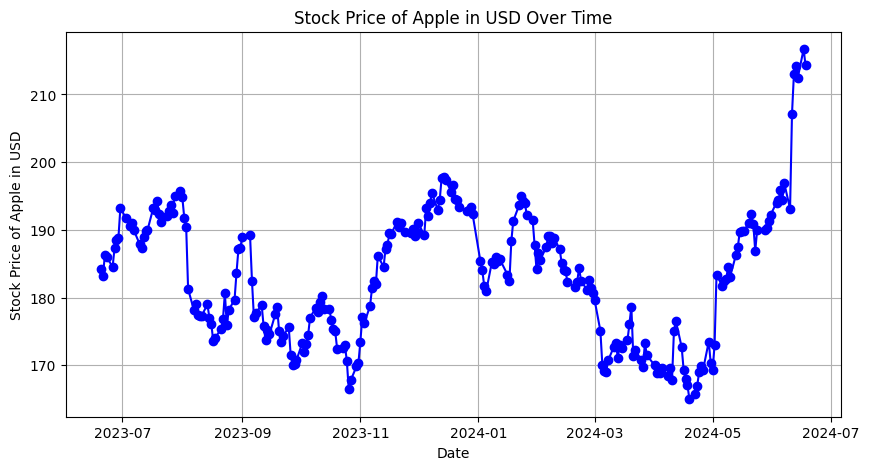

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df['Adjusted Close Price'], marker='o', linestyle='-', color='b')
plt.title('Stock Price of Apple in USD Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price of Apple in USD')
plt.grid(True)
plt.show()